In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

sns.set(style="darkgrid", palette="viridis", context='notebook')

# GD

In [2]:
with open('long-test/gd-results.txt', 'r') as file:
    data = file.read().replace('\n', '')


In [3]:
gd_d = ast.literal_eval(data)

In [4]:
gd_d.keys()

dict_keys(['estimated_fluxes', 'estimated_dmdt', 'target_dmdt', 'estimated_exchange_dmdt'])

In [5]:
df1 = pd.DataFrame(gd_d['estimated_dmdt'])
df1

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,-347,-879,-2,-353,-759,-132,614,-1971,-2445,-13,...,-164954,-34,-156,209,-26,119,-165,-248,1982,-26
1,-275,-714,-267,-269,-613,-103,103,-2367,-2238,-10,...,-133052,-99,-157,-209,-96,-27,-191,-171,875,-273
2,-229,-585,-177,-229,-503,-87,-110,-1824,-1796,-9,...,-109273,-128,-150,-226,-127,-102,-174,-166,220,-191
3,-183,-469,-147,-183,-405,-69,-103,-1482,-1448,-7,...,-87866,-137,-134,-206,-136,-139,-147,-133,-165,-158
4,-147,-377,-116,-149,-325,-56,-83,-1190,-1162,-6,...,-70555,-131,-118,-168,-133,-149,-120,-107,-363,-126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,148,379,97,148,327,56,20,1133,1147,5,...,70888,103,105,104,103,100,107,107,61,106
96,151,385,98,151,331,57,18,1147,1164,6,...,71937,105,107,106,104,102,108,109,64,108
97,152,390,100,152,336,57,19,1165,1181,6,...,73012,106,109,106,106,103,110,110,67,108
98,156,398,102,156,342,59,20,1186,1203,5,...,74322,108,111,109,108,105,112,113,65,111


In [6]:
df1 = pd.DataFrame(gd_d['estimated_dmdt'])
df1 = df1.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')
df1

,index,timestep,update
0,2-3-DIHYDROXYBENZOATE[c],0,-347
1,2-KETOGLUTARATE[c],0,-879
2,2-PG[c],0,-2
3,2K-4CH3-PENTANOATE[c],0,-353
4,4-AMINO-BUTYRATE[c],0,-759
...,...,...,...
17095,MN+2[p],99,106
17096,NA+[p],99,113
17097,OXYGEN-MOLECULE[p],99,114
17098,CA+2[p],99,68


In [7]:
df2 = pd.DataFrame(gd_d['target_dmdt'])
df2

,2-3-DIHYDROXYBENZOATE[c],2-KETOGLUTARATE[c],2-PG[c],2K-4CH3-PENTANOATE[c],4-AMINO-BUTYRATE[c],4-hydroxybenzoate[c],ACETOACETYL-COA[c],ACETYL-COA[c],ACETYL-P[c],ADENINE[c],...,glycogen-monomer[c],NI+2[p],CO+2[p],FE+2[p],ZN+2[p],MN+2[p],NA+[p],OXYGEN-MOLECULE[p],CA+2[p],Pi[p]
0,-345,-882,-230,-345,-759,-131,-54,-2643,-2673,-13,...,-164954,-250,-250,-250,-250,-250,-250,-250,-250,-250
1,-276,-715,-413,-270,-613,-104,-334,-2804,-2384,-11,...,-133052,-418,-296,-661,-426,-571,-287,-172,-2404,-420
2,-229,-585,-298,-229,-503,-87,-473,-2188,-1917,-9,...,-109274,-484,-304,-617,-495,-709,-261,-166,-3444,-312
3,-184,-469,-243,-184,-405,-70,-392,-1772,-1545,-7,...,-87867,-489,-287,-524,-501,-740,-220,-133,-3797,-254
4,-148,-378,-194,-148,-325,-56,-313,-1420,-1240,-6,...,-70555,-459,-260,-425,-472,-708,-180,-107,-3739,-203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,148,379,126,147,326,55,104,1217,1176,5,...,70888,373,222,343,382,560,160,107,2847,135
96,151,384,129,150,330,56,108,1237,1194,5,...,71936,379,226,348,388,569,162,109,2895,138
97,152,390,132,151,335,57,114,1260,1214,5,...,73011,384,229,352,394,577,164,110,2941,140
98,156,397,136,155,341,58,119,1286,1237,5,...,74322,391,233,359,401,587,167,113,2987,145


In [8]:
df2 = pd.DataFrame(gd_d['estimated_dmdt'])
df2 = df2.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df2

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,-347
1,2-KETOGLUTARATE[c],0,-879
2,2-PG[c],0,-2
3,2K-4CH3-PENTANOATE[c],0,-353
4,4-AMINO-BUTYRATE[c],0,-759
...,...,...,...
17095,MN+2[p],99,106
17096,NA+[p],99,113
17097,OXYGEN-MOLECULE[p],99,114
17098,CA+2[p],99,68


In [9]:
df3 = df1.merge(df2, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
df3

,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,-347,-347
1,2-KETOGLUTARATE[c],0,-879,-879
2,2-PG[c],0,-2,-2
3,2K-4CH3-PENTANOATE[c],0,-353,-353
4,4-AMINO-BUTYRATE[c],0,-759,-759
...,...,...,...,...
17095,MN+2[p],99,106,106
17096,NA+[p],99,113,113
17097,OXYGEN-MOLECULE[p],99,114,114
17098,CA+2[p],99,68,68


In [10]:
df3['update'] = df3['update'].abs() 
df3['target'] = df3['target'].abs() 

df3['update'] = np.log10(df3['update'])
df3['target'] = np.log10(df3['target'])

df3

/home/jc/miniconda3/envs/echelon/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,2.540329,2.540329
1,2-KETOGLUTARATE[c],0,2.943989,2.943989
2,2-PG[c],0,0.301030,0.301030
3,2K-4CH3-PENTANOATE[c],0,2.547775,2.547775
4,4-AMINO-BUTYRATE[c],0,2.880242,2.880242
...,...,...,...,...
17095,MN+2[p],99,2.025306,2.025306
17096,NA+[p],99,2.053078,2.053078
17097,OXYGEN-MOLECULE[p],99,2.056905,2.056905
17098,CA+2[p],99,1.832509,1.832509


In [11]:
df3_subset = df3[df3['timestep'].isin([0, 1, 2, 50, 99])]

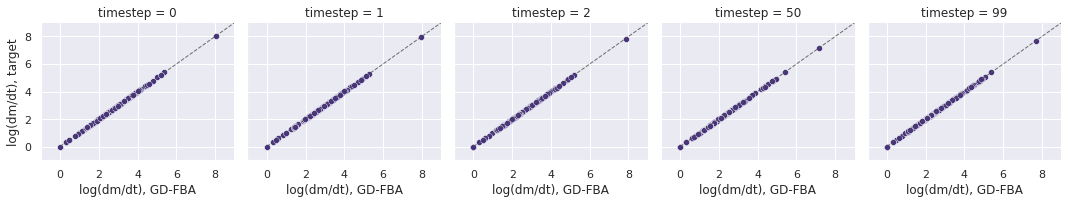

In [12]:
g = sns.FacetGrid(df3_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,9), ylim=(-1,9))
g.map(sns.scatterplot, "update", "target")
g.set_axis_labels("log(dm/dt), GD-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

# LP

In [13]:
with open('long-test/lp-results.txt', 'r') as file:
    data = file.read().replace('\n', '')


In [14]:
lp_d = ast.literal_eval(data)

In [15]:
lp_d.keys()

dict_keys(['estimated_fluxes', 'estimated_dmdt', 'target_dmdt', 'estimated_exchange_dmdt'])

In [16]:
df5 = pd.DataFrame(lp_d['estimated_dmdt'])
df5 = df5.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='update')
df5

df6 = pd.DataFrame(lp_d['estimated_dmdt'])
df6 = df6.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='target')
df6

,index,timestep,target
0,2-3-DIHYDROXYBENZOATE[c],0,0
1,2-KETOGLUTARATE[c],0,0
2,2-PG[c],0,0
3,2K-4CH3-PENTANOATE[c],0,0
4,4-AMINO-BUTYRATE[c],0,0
...,...,...,...
17095,WATER[c],99,405819629
17096,XYLULOSE-5-PHOSPHATE[c],99,1305
17097,ZN+2[c],99,1300
17098,ZN+2[p],99,770


In [17]:
df7 = df5.merge(df6, left_on=['index', 'timestep'], right_on=['index', 'timestep'])
df7

,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,0,0
1,2-KETOGLUTARATE[c],0,0,0
2,2-PG[c],0,0,0
3,2K-4CH3-PENTANOATE[c],0,0,0
4,4-AMINO-BUTYRATE[c],0,0,0
...,...,...,...,...
17095,WATER[c],99,405819629,405819629
17096,XYLULOSE-5-PHOSPHATE[c],99,1305,1305
17097,ZN+2[c],99,1300,1300
17098,ZN+2[p],99,770,770


In [18]:
df7['update'] = df7['update'].abs() 
df7['target'] = df7['target'].abs() 

df7['update'] = np.log10(df7['update'])
df7['target'] = np.log10(df7['target'])

df7

/home/jc/miniconda3/envs/echelon/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,update,target
0,2-3-DIHYDROXYBENZOATE[c],0,-inf,-inf
1,2-KETOGLUTARATE[c],0,-inf,-inf
2,2-PG[c],0,-inf,-inf
3,2K-4CH3-PENTANOATE[c],0,-inf,-inf
4,4-AMINO-BUTYRATE[c],0,-inf,-inf
...,...,...,...,...
17095,WATER[c],99,8.608333,8.608333
17096,XYLULOSE-5-PHOSPHATE[c],99,3.115611,3.115611
17097,ZN+2[c],99,3.113943,3.113943
17098,ZN+2[p],99,2.886491,2.886491


In [19]:
df7_subset = df7[df7['timestep'].isin([0, 1, 2, 50, 99])]

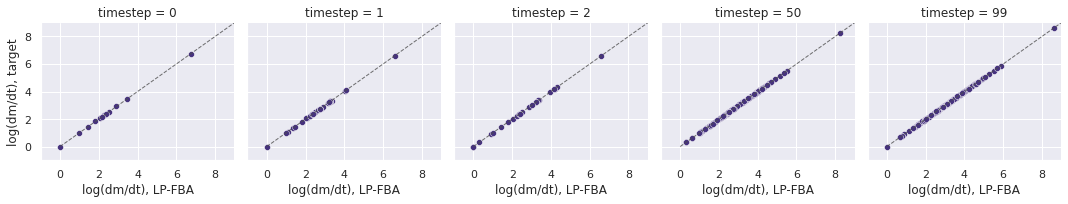

In [21]:
g = sns.FacetGrid(df7_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-1,9), ylim=(-1,9))
g.map(sns.scatterplot, "update", "target")
g.set_axis_labels("log(dm/dt), LP-FBA","log(dm/dt), target")

for ax in g.axes:
    ax.plot([0, 9], [0, 9], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    

plt.margins(0,0)

# Fluxes

In [32]:
df10 = pd.DataFrame(gd_d['estimated_fluxes'])
df10 = df10.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='flux-gd')
df10

,index,timestep,flux-gd
0,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,0,-5.519828e-05
1,1.1.1.127-RXN,0,-1.324711e-06
2,1.1.1.215-RXN (reverse),0,3.089716e-01
3,1.1.1.251-RXN,0,-1.648317e-04
4,1.1.1.271-RXN (reverse),0,-5.669799e-03
...,...,...,...
566895,XYLULOKIN-RXN,99,-1.458712e-07
566896,YIAE1-RXN (reverse),99,6.188035e-03
566897,YIAE2-RXN (reverse),99,-5.738906e-03
566898,glycogen-monomer-extension,99,5.627851e-02


In [33]:
df11 = pd.DataFrame(lp_d['estimated_fluxes'])
df11 = df11.transpose().reset_index().melt(id_vars='index', var_name='timestep', value_name='flux-lp')
df11

,index,timestep,flux-lp
0,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,0,0.000000
1,1.1.1.127-RXN,0,0.000000
2,1.1.1.127-RXN (reverse),0,0.000000
3,1.1.1.215-RXN (reverse),0,0.000000
4,1.1.1.251-RXN,0,0.000000
...,...,...,...
750795,XYLONATE-DEHYDRATASE-RXN,99,0.000000
750796,XYLULOKIN-RXN,99,0.000000
750797,YIAE1-RXN (reverse),99,0.000000
750798,YIAE2-RXN (reverse),99,0.000000


In [37]:
df12 = df10.merge(df11, left_on=['index', 'timestep'], right_on=['index', 'timestep'])

df12['flux-gd'] = df12['flux-gd'].abs() 
df12['flux-gd'] = np.log10(df12['flux-gd'])

df12['flux-lp'] = df12['flux-lp'].abs() 
df12['flux-lp'] = np.log10(df12['flux-lp'])

df12.replace([np.inf, -np.inf], np.nan, inplace=True)
df12 = df12.dropna()
df12

/home/jc/miniconda3/envs/echelon/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,timestep,flux-gd,flux-lp
47,1.8.4.8-RXN (reverse),0,-0.249405,-4.909483
87,2.5.1.19-RXN,0,-0.112679,-1.034919
93,2.7.1.148-RXN,0,-0.688618,-2.749018
99,2.7.7.13-RXN,0,-1.547900,-2.545775
100,2.7.7.60-RXN,0,-0.689348,-2.749018
...,...,...,...,...
566781,UROGENDECARBOX-RXN,99,-3.546976,-3.397412
566782,UROGENIIISYN-RXN,99,-3.711537,-3.096272
566784,URPHOS-RXN,99,-1.173466,0.386338
566785,URPHOS-RXN__URPHOS-CPLX,99,-0.854562,-1.429118


In [38]:
df12_subset = df12[df12['timestep'].isin([0, 1, 2, 50, 99])]

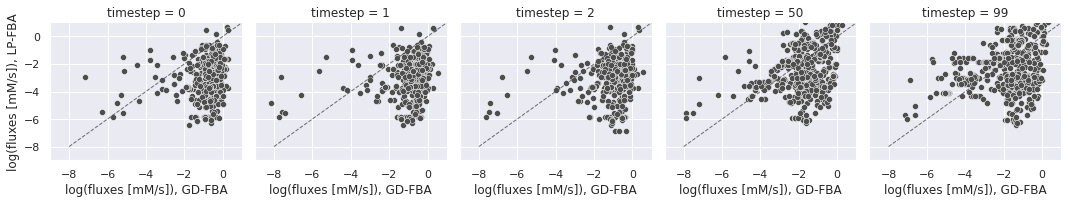

In [39]:
g = sns.FacetGrid(df12_subset, col="timestep", col_wrap=5, aspect=1, xlim=(-9,1), ylim=(-9,1))
g.map(sns.scatterplot, "flux-gd", "flux-lp", color=".3")
g.set_axis_labels("log(fluxes [mM/s]), GD-FBA","log(fluxes [mM/s]), LP-FBA")

for ax in g.axes:
    ax.plot([-8, 1], [-8, 1], linewidth=1,  linestyle='--', color='.3', alpha=0.8)
    
plt.margins(0,0)

# Steady state

In [45]:
exchange = {'CO+2[p]', 'MI-PENTAKISPHOSPHATE[p]', 'CPD-1772[c]', 'GLC[p]', 'PROTON[p]', 'BUTANAL[c]', 'Pi[p]', 'SULFATE[p]', 'HYDROGEN-MOLECULE[c]', 'CA+2[p]', 'AMMONIUM[c]', 'UNDECAPRENYL-DIPHOSPHATE[p]', 'GLYCEROL[p]', 'GLYCOLALDEHYDE[c]', 'CH33ADO[c]', 'MN+2[p]', 'WATER[p]', 'FE+2[p]', 'CPD-534[p]', 'CL-[p]', 'GLYCOLLATE[c]', 'NI+2[p]', 'BETAINE[p]', 'CARBON-MONOXIDE[p]', 'THYMINE[p]', 'ZN+2[p]', 'L-SELENOCYSTEINE[c]', 'S-ADENOSYL-4-METHYLTHIO-2-OXOBUTANOATE[c]', 'MG+2[p]', 'CPD-108[p]', 'METOH[p]', 'CPD0-2167[c]', 'CPD-239[p]', 'SUC[p]', 'HYPOXANTHINE[p]', 'K+[p]', 'XANTHINE[p]', 'ACET[p]', 'INDOLE[p]', 'ETOH[p]', 'D-LACTATE[p]', 'OXYGEN-MOLECULE[p]', 'UREA[p]', 'FORMATE[p]', 'CPD-560[p]', 'CPD-10774[p]', 'CPD-564[c]', 'CARBON-DIOXIDE[p]', 'NA+[p]', 'URACIL[p]', 'D-ALANINE[p]'}
exchange = set(exchange)

objective = {'2-3-DIHYDROXYBENZOATE[c]': 112919, '2-KETOGLUTARATE[c]': 288844, '2-PG[c]': 75115, '2K-4CH3-PENTANOATE[c]': 112919, '4-AMINO-BUTYRATE[c]': 248750, '4-hydroxybenzoate[c]': 42713, 'ACETOACETYL-COA[c]': 17838, 'ACETYL-COA[c]': 865715, 'ACETYL-P[c]': 875535, 'ADENINE[c]': 4275, 'ADENOSINE[c]': 107, 'ADP-D-GLUCOSE[c]': 3493, 'ADP[c]': 405582, 'AMP[c]': 143890, 'ANTHRANILATE[c]': 2847, 'APS[c]': 5425, 'ARG[c]': 295390, 'ASN[c]': 347486, 'ATP[c]': 7879815, 'BIOTIN[c]': 16815, 'CA+2[c]': 2111597, 'CAMP[c]': 10956, 'CARBAMYUL-L-ASPARTATE[c]': 482771, 'CARBON-DIOXIDE[c]': 61532, 'CDP[c]': 25120, 'CHORISMATE[c]': 83325, 'CIS-ACONITATE[c]': 10678, 'CIT[c]': 1501501, 'CL-[c]': 2111703, 'CMP[c]': 469679, 'CO+2[c]': 10234, 'CO-A[c]': 603464, 'CPD-12115[c]': 83326, 'CPD-12261[p]': 1539593, 'CPD-12575[c]': 2045642, 'CPD-12819[c]': 34323606, 'CPD-12824[c]': 2287880, 'CPD-13469[c]': 940995, 'CPD-2961[c]': 1699519, 'CPD-8260[c]': 8236938, 'CPD-9956[c]': 83326, 'CPD0-939[c]': 2990207, 'CTP[c]': 1469589, 'CYS[c]': 14933, 'CYTIDINE[c]': 1505, 'CYTOSINE[c]': 7752, 'D-ALA-D-ALA[c]': 84280, 'D-SEDOHEPTULOSE-7-P[c]': 309846, 'DAMP[c]': 7233, 'DATP[c]': 12682, 'DCTP[c]': 28229, 'DEOXY-RIBOSE-5P[c]': 247931, 'DEOXYADENOSINE[c]': 2307, 'DEOXYGUANOSINE[c]': 427, 'DGMP[c]': 41485, 'DGTP[c]': 12682, 'DI-H-OROTATE[c]': 1592287, 'DIHYDROXY-ACETONE-PHOSPHATE[c]': 1543232, 'DPG[c]': 12887, 'ENTEROBACTIN[c]': 83325, 'ERYTHROSE-4P[c]': 39849, 'FAD[c]': 141558, 'FE+2[c]': 2723965, 'FMN[c]': 43940, 'FRUCTOSE-16-DIPHOSPHATE[c]': 5215025, 'FRUCTOSE-6P[c]': 1161106, 'FUM[c]': 612874, 'G3P[c]': 1260115, 'GDP[c]': 340913, 'GLC-6-P[c]': 3627742, 'GLN[c]': 2582964, 'GLT[c]': 20374601, 'GLUCONATE[c]': 34039, 'GLUTATHIONE[c]': 9622703, 'GLYCERATE[c]': 1153742, 'GLYCEROL-3P[c]': 142785, 'GLY[c]': 353487, 'GMP[c]': 14409, 'GTP[c]': 1746978, 'GUANINE[c]': 78564, 'GUANOSINE[c]': 876, 'HISTIDINOL[c]': 9614, 'HIS[c]': 56173, 'HOMO-CYS[c]': 302755, 'HOMO-SER[c]': 194745, 'HYPOXANTHINE[c]': 630, 'ILE[c]': 124375, 'IMP[c]': 630712, 'INOSINE[c]': 572, 'K+[c]': 79184601, 'L-ALPHA-ALANINE[c]': 1205292, 'L-ARGININO-SUCCINATE[c]': 144013, 'L-ASPARTATE[c]': 1964362, 'L-CITRULLINE[c]': 624330, 'L-ORNITHINE[c]': 8264, 'L-SELENOCYSTEINE[c]': 29866, 'LEU[c]': 124375, 'LL-DIAMINOPIMELATE[c]': 88371, 'LYS[c]': 438585, 'MALONYL-COA[c]': 28966, 'MAL[c]': 1622876, 'METHYLENE-THF[c]': 78095, 'MET[c]': 81825, 'MG+2[c]': 3519363, 'MN+2[c]': 280593, 'N-ACETYL-D-GLUCOSAMINE-1-P[c]': 67015, 'N-ALPHA-ACETYLORNITHINE[c]': 35430, 'NADH[c]': 44799, 'NADPH[c]': 123147, 'NADP[c]': 90450, 'NAD[c]': 1910630, 'NI+2[c]': 130899, 'OROTATE[c]': 4475866, 'OXALACETIC_ACID[c]': 398, 'OXIDIZED-GLUTATHIONE[c]': 1102601, 'PANTOTHENATE[c]': 38008, 'PHENYL-PYRUVATE[c]': 73479, 'PHE[c]': 48331, 'PHOSPHO-ENOL-PYRUVATE[c]': 102827, 'PPI[c]': 409128, 'PROPIONYL-COA[c]': 4353, 'PROTOHEME[c]': 83326, 'PROTON[c]': 51, 'PRO[c]': 317074, 'PRPP[c]': 211110, 'PUTRESCINE[c]': 12431905, 'PYRIDOXAL_PHOSPHATE[c]': 75478, 'PYRUVATE[c]': 2994820, 'Pi[c]': 409128, 'QUINOLINATE[c]': 9409, 'REDUCED-MENAQUINONE[c]': 83326, 'RIBOFLAVIN[c]': 15546, 'RIBOSE-1P[c]': 2454, 'RIBOSE-5P[c]': 400945, 'RIBULOSE-5P[c]': 186562, 'S-ADENOSYLMETHIONINE[c]': 150559, 'SER[c]': 646423, 'SHIKIMATE[c]': 11537, 'SIROHEME[c]': 83325, 'SPERMIDINE[c]': 2520006, 'SUC-COA[c]': 190653, 'SUC[c]': 385944, 'TDP[c]': 309301, 'THF[c]': 77347, 'THIAMINE-PYROPHOSPHATE[c]': 75853, 'THREO-DS-ISO-CITRATE[c]': 222443, 'THR[c]': 1031003, 'TRP[c]': 14933, 'TTP[c]': 3780347, 'TYR[c]': 80707, 'UDP-GLUCURONATE[c]': 463133, 'UDP-N-ACETYL-D-GLUCOSAMINE[c]': 4054872, 'UDP[c]': 781844, 'UMP[c]': 58014, 'UNDECAPRENYL-DIPHOSPHATE[c]': 20551, 'URIDINE[c]': 1710157, 'UTP[c]': 3858082, 'VAL[c]': 1876263, 'WATER[c]': 34974074022, 'XYLULOSE-5-PHOSPHATE[c]': 138694, 'ZN+2[c]': 138185, 'glycogen-monomer[c]': 54028202, 'NI+2[p]': 81825, 'CO+2[p]': 81825, 'FE+2[p]': 81825, 'ZN+2[p]': 81825, 'MN+2[p]': 81825, 'NA+[p]': 81825, 'OXYGEN-MOLECULE[p]': 81825, 'CA+2[p]': 81825, 'Pi[p]': 81825}
objective = set(objective)

total = exchange.union(objective)

In [46]:
with open('long-test/gd-results_plus.txt', 'r') as file:
    data = file.read().replace('\n', '')

gd_p_d = ast.literal_eval(data)

In [47]:
gd_p_d.keys()

dict_keys(['estimated_fluxes', 'estimated_homeostatic_dmdt', 'target_homeostatic_dmdt', 'estimated_exchange_dmdt', 'estimated_all_dmdt'])

In [48]:
df20 = pd.DataFrame(gd_p_d['estimated_all_dmdt'])
df20

,ACYL-SN-GLYCEROL-3P[c],ACYL-ACP[c],L-PHOSPHATIDATE[c],ACP[c],2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],NAD[c],CPD-343[c],NADH[c],PROTON[c],GLUCONATE[c],...,UHPB-MONOMER[CCI-PM-BAC-NEG-GN],PHOSPHO-UHPB[CCI-PM-BAC-NEG-GN],UHPC-MONOMER[c],GLU-UHPC[c],UNDECAPRENYL-DIPHOSPHATE[CCI-PERI-BAC-GN],CPD-9646[CCI-PERI-BAC-GN],URIDYLYL-PII[c],PROTEIN-PII[c],D-XYLULOSE[c],glycogen-monomer[c]
0,0.000116,-0.000018,0.000052,4.369824e-05,-3.479523e-06,-0.004174,3.021786e-06,0.000287,0.000010,-8.551915e-05,...,-0.000094,0.000094,-0.000093,0.000093,7.673433e-08,-7.673433e-08,0.000093,-0.000093,-3.873230e-06,-0.129200
1,0.000086,-0.000028,0.000060,-1.722875e-06,-5.419866e-08,-0.003874,-4.760492e-08,-0.000257,-0.000003,3.493832e-05,...,-0.000056,0.000056,-0.000056,0.000056,1.868569e-10,-1.868569e-10,0.000057,-0.000057,-5.709801e-08,-0.104764
2,0.000071,-0.000023,0.000047,1.116082e-06,-1.035962e-07,-0.003082,-1.170888e-07,-0.000109,-0.015237,-5.392569e-05,...,-0.000047,0.000047,-0.000047,0.000047,-2.165763e-12,2.165763e-12,0.000047,-0.000047,-5.573598e-08,-0.086050
3,0.000057,-0.000018,0.000038,1.537508e-06,-7.431674e-08,-0.002489,-8.350819e-08,-0.000096,-0.020729,-4.390203e-05,...,-0.000038,0.000038,-0.000038,0.000038,-4.637545e-11,4.637545e-11,0.000038,-0.000038,-2.794233e-08,-0.069323
4,0.000045,-0.000014,0.000030,5.115987e-07,-1.000284e-07,-0.002005,-1.458804e-07,-0.000077,-0.028260,-3.504961e-05,...,-0.000030,0.000030,-0.000030,0.000030,-6.491827e-11,6.491827e-11,0.000030,-0.000030,-1.053700e-07,-0.055762
5,0.000036,-0.000012,0.000024,5.434284e-07,-1.828873e-07,-0.001603,-1.493862e-07,-0.000062,-0.035279,-2.855392e-05,...,-0.000024,0.000024,-0.000024,0.000024,-4.975754e-10,4.975754e-10,0.000024,-0.000024,-7.539065e-08,-0.044709
6,0.000030,-0.000009,0.000020,6.039552e-08,-2.516098e-07,-0.001280,-1.304420e-07,-0.000048,-0.042903,-2.248375e-05,...,-0.000019,0.000019,-0.000019,0.000019,1.385741e-10,-1.385741e-10,0.000019,-0.000019,-1.487326e-07,-0.035602
7,0.000024,-0.000007,0.000016,5.143370e-07,-1.597457e-07,-0.001020,-3.365395e-08,-0.000039,-0.046719,-1.824803e-05,...,-0.000016,0.000016,-0.000016,0.000016,-1.725204e-10,1.725204e-10,0.000016,-0.000016,-8.079016e-08,-0.028466
8,0.000019,-0.000006,0.000012,5.207909e-07,-3.146595e-07,-0.000803,-1.785513e-07,-0.000029,-0.052006,-1.410226e-05,...,-0.000013,0.000013,-0.000013,0.000013,9.470320e-11,-9.470320e-11,0.000013,-0.000013,-2.467262e-07,-0.022351
9,0.000017,-0.000005,0.000011,4.753828e-07,-8.584817e-08,-0.000615,-5.133146e-09,-0.000021,-0.064103,-1.045581e-05,...,-0.000011,0.000011,-0.000011,0.000011,3.131399e-11,-3.131399e-11,0.000011,-0.000011,-1.256669e-07,-0.017229


In [50]:
df21 = pd.DataFrame(df20).transpose().reset_index()
df21['steady-state'] = ~df21['index'].isin(total)
df21

,index,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,steady-state
0,ACYL-SN-GLYCEROL-3P[c],1.158257e-04,8.647851e-05,7.115810e-05,5.654948e-05,4.526758e-05,3.624818e-05,2.951331e-05,2.358008e-05,1.887744e-05,...,2.451779e-05,2.375008e-05,2.291077e-05,2.200059e-05,2.115160e-05,2.083773e-05,2.034911e-05,1.948877e-05,1.894435e-05,True
1,ACYL-ACP[c],-1.753733e-05,-2.832624e-05,-2.250605e-05,-1.752935e-05,-1.434455e-05,-1.169978e-05,-9.174453e-06,-7.217555e-06,-5.946784e-06,...,-7.917512e-06,-7.650862e-06,-7.384585e-06,-7.102502e-06,-6.846574e-06,-6.714429e-06,-6.575878e-06,-6.309353e-06,-6.111122e-06,True
2,L-PHOSPHATIDATE[c],5.231466e-05,5.996020e-05,4.742523e-05,3.755209e-05,3.045335e-05,2.396878e-05,2.034293e-05,1.586069e-05,1.238025e-05,...,1.653906e-05,1.600847e-05,1.547077e-05,1.485559e-05,1.432091e-05,1.406718e-05,1.377764e-05,1.320211e-05,1.279985e-05,True
3,ACP[c],4.369824e-05,-1.722875e-06,1.116082e-06,1.537508e-06,5.115987e-07,5.434284e-07,6.039552e-08,5.143370e-07,5.207909e-07,...,6.348907e-08,1.055419e-07,7.967056e-08,6.899124e-08,-2.115940e-08,1.194751e-07,1.826207e-08,-3.880712e-08,2.296803e-08,True
4,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],-3.479523e-06,-5.419866e-08,-1.035962e-07,-7.431674e-08,-1.000284e-07,-1.828873e-07,-2.516098e-07,-1.597457e-07,-3.146595e-07,...,-9.206858e-09,-1.139009e-08,-1.736308e-09,-4.812535e-10,-8.465929e-10,7.251550e-09,8.739151e-10,-7.390395e-09,3.951911e-09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,CPD-9646[CCI-PERI-BAC-GN],-7.673433e-08,-1.868569e-10,2.165763e-12,4.637545e-11,6.491827e-11,4.975754e-10,-1.385741e-10,1.725204e-10,-9.470320e-11,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,True
5310,URIDYLYL-PII[c],9.293865e-05,5.651860e-05,4.731424e-05,3.777596e-05,2.994446e-05,2.412919e-05,1.928517e-05,1.563439e-05,1.269428e-05,...,1.625254e-05,1.575101e-05,1.518912e-05,1.458296e-05,1.400048e-05,1.382548e-05,1.348710e-05,1.289817e-05,1.256022e-05,True
5311,PROTEIN-PII[c],-9.293865e-05,-5.651860e-05,-4.731424e-05,-3.777596e-05,-2.994446e-05,-2.412919e-05,-1.928517e-05,-1.563439e-05,-1.269428e-05,...,-1.625254e-05,-1.575101e-05,-1.518912e-05,-1.458296e-05,-1.400048e-05,-1.382548e-05,-1.348710e-05,-1.289817e-05,-1.256022e-05,True
5312,D-XYLULOSE[c],-3.873230e-06,-5.709801e-08,-5.573598e-08,-2.794233e-08,-1.053700e-07,-7.539065e-08,-1.487326e-07,-8.079016e-08,-2.467262e-07,...,1.940309e-08,-1.392913e-08,-2.339988e-08,1.986372e-09,8.408443e-09,-8.910674e-09,2.867420e-08,-1.938916e-08,1.523434e-08,True


In [59]:
df22 = df21.melt(id_vars=['index','steady-state'], var_name='timestep', value_name='dmdt')
df22

,index,steady-state,timestep,dmdt
0,ACYL-SN-GLYCEROL-3P[c],True,0,1.158257e-04
1,ACYL-ACP[c],True,0,-1.753733e-05
2,L-PHOSPHATIDATE[c],True,0,5.231466e-05
3,ACP[c],True,0,4.369824e-05
4,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],True,0,-3.479523e-06
...,...,...,...,...
271009,CPD-9646[CCI-PERI-BAC-GN],True,50,0.000000e+00
271010,URIDYLYL-PII[c],True,50,1.256022e-05
271011,PROTEIN-PII[c],True,50,-1.256022e-05
271012,D-XYLULOSE[c],True,50,1.523434e-08


In [60]:
df22['dmdt-counts'] = df22['dmdt']/3.133067187321868e-06*4

df22['dmdt-counts'] = df22['dmdt-counts'].abs()

df22['dmdt-counts'] = np.log10(df22['dmdt-counts'])

df22

/home/jc/miniconda3/envs/echelon/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,index,steady-state,timestep,dmdt,dmdt-counts
0,ACYL-SN-GLYCEROL-3P[c],True,0,1.158257e-04,2.169895
1,ACYL-ACP[c],True,0,-1.753733e-05,1.350054
2,L-PHOSPHATIDATE[c],True,0,5.231466e-05,1.824714
3,ACP[c],True,0,4.369824e-05,1.746554
4,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],True,0,-3.479523e-06,0.647610
...,...,...,...,...,...
271009,CPD-9646[CCI-PERI-BAC-GN],True,50,0.000000e+00,-inf
271010,URIDYLYL-PII[c],True,50,1.256022e-05,1.205088
271011,PROTEIN-PII[c],True,50,-1.256022e-05,1.205088
271012,D-XYLULOSE[c],True,50,1.523434e-08,-1.711086


In [62]:
df22 = df22.dropna()
df22 = df22[~df22.isin([np.nan, np.inf, -np.inf]).any(1)]

df22_subset = df22[df22['timestep'].isin([0, 1, 2, 50])]
df22_subset

,index,steady-state,timestep,dmdt,dmdt-counts
0,ACYL-SN-GLYCEROL-3P[c],True,0,1.158257e-04,2.169895
1,ACYL-ACP[c],True,0,-1.753733e-05,1.350054
2,L-PHOSPHATIDATE[c],True,0,5.231466e-05,1.824714
3,ACP[c],True,0,4.369824e-05,1.746554
4,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],True,0,-3.479523e-06,0.647610
...,...,...,...,...,...
271007,GLU-UHPC[c],True,50,1.253746e-05,1.204300
271010,URIDYLYL-PII[c],True,50,1.256022e-05,1.205088
271011,PROTEIN-PII[c],True,50,-1.256022e-05,1.205088
271012,D-XYLULOSE[c],True,50,1.523434e-08,-1.711086


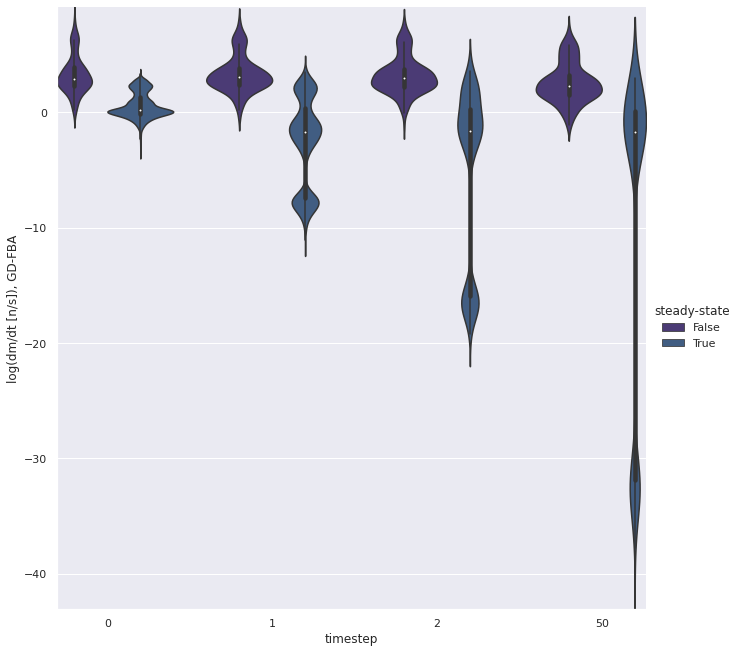

In [66]:
g = sns.catplot(x="timestep", y="dmdt-counts", hue="steady-state", kind="violin", data=df22_subset, aspect=1, height=9)

g.set_axis_labels("timestep", "log(dm/dt [n/s]), GD-FBA")

plt.margins(0,0)


# What happens to the non steady-state intermediates?

In [113]:
df22['dmdt-counts'] = df22['dmdt']/3.133067187321868e-06*4

df22

,index,steady-state,timestep,dmdt,dmdt-counts
0,ACYL-SN-GLYCEROL-3P[c],True,0,1.158257e-04,147.875201
1,ACYL-ACP[c],True,0,-1.753733e-05,-22.389977
2,L-PHOSPHATIDATE[c],True,0,5.231466e-05,66.790346
3,ACP[c],True,0,4.369824e-05,55.789722
4,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],True,0,-3.479523e-06,-4.442321
...,...,...,...,...,...
271007,GLU-UHPC[c],True,50,1.253746e-05,16.006627
271010,URIDYLYL-PII[c],True,50,1.256022e-05,16.035685
271011,PROTEIN-PII[c],True,50,-1.256022e-05,-16.035685
271012,D-XYLULOSE[c],True,50,1.523434e-08,0.019450


In [114]:
df22_subset = df22[df22['timestep'].isin([45,46,47,48,49,50])]
df22_subset

,index,steady-state,timestep,dmdt,dmdt-counts
239130,ACYL-SN-GLYCEROL-3P[c],True,45,2.200059e-05,28.088246
239131,ACYL-ACP[c],True,45,-7.102502e-06,-9.067794
239132,L-PHOSPHATIDATE[c],True,45,1.485559e-05,18.966191
239133,ACP[c],True,45,6.899124e-08,0.088081
239134,2-DEHYDRO-3-DEOXY-D-GLUCONATE[c],True,45,-4.812535e-10,-0.000614
...,...,...,...,...,...
271007,GLU-UHPC[c],True,50,1.253746e-05,16.006627
271010,URIDYLYL-PII[c],True,50,1.256022e-05,16.035685
271011,PROTEIN-PII[c],True,50,-1.256022e-05,-16.035685
271012,D-XYLULOSE[c],True,50,1.523434e-08,0.019450


In [115]:
nonsteady = set(df22_subset[df22_subset["dmdt-counts"].abs() > 100]["index"])
len(nonsteady)

283

In [116]:
df22_subset2 = df22[df22['index'].isin(nonsteady)]
df22_subset2 = df22_subset2[df22_subset2['steady-state'] == True]
df22_subset2

,index,steady-state,timestep,dmdt,dmdt-counts
187,2-PHOSPHO-4-CYTIDINE-5-DIPHOSPHO-2-C-MET[c],True,0,0.000529,675.987435
202,2-5-TRIPHOSPHORIBOSYL-3-DEPHOSPHO-[c],True,0,0.000928,1184.353054
228,CPD-650[c],True,0,0.000544,694.987127
229,CROTONYL-COA[c],True,0,0.000548,699.428035
329,ADENOSYL-P4[c],True,0,0.000754,962.275489
...,...,...,...,...,...
270044,CPD0-939[e],True,50,0.000102,130.125892
270519,CA+2[e],True,50,-0.000665,-848.634203
270585,MN+2[e],True,50,-0.000110,-140.109740
270594,P3I[p],True,50,0.000075,95.989849


<AxesSubplot:xlabel='timestep', ylabel='dmdt-counts'>

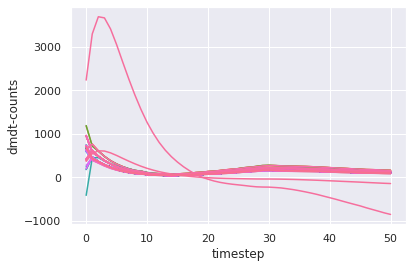

In [117]:
sns.lineplot(x="timestep", y="dmdt-counts",hue="index", data=df22_subset2, legend=False)